<a href="https://colab.research.google.com/github/Malar-cmd/Cartoonize/blob/main/Cartoonification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def read_file(path):
  img=cv2.imread(path)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  return img

In [26]:
image=read_file('image.jpg')
image
og=np.copy(image)

In [27]:
def edge(pic,line,blur):
    gray_img = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
    blur_img=cv2.medianBlur(gray_img,blur)
    edges=cv2.adaptiveThreshold(blur_img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,line,blur)
    return edges


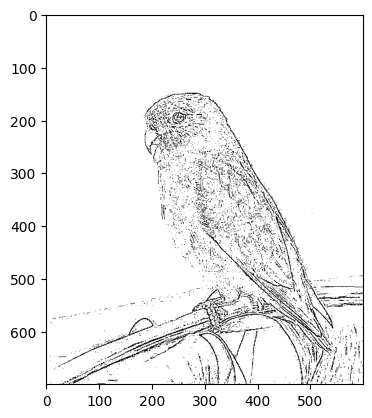

In [28]:
line,blur=3,3
edges=edge(image,line,blur)
plt.imshow(edges,cmap='gray')
plt.show()

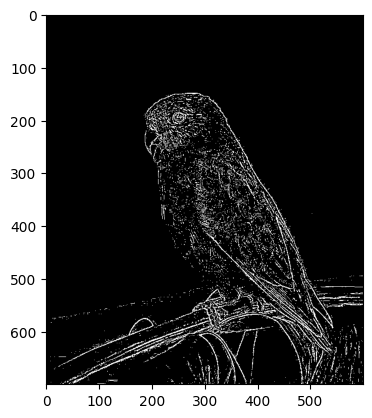

In [29]:
plt.imshow(edges,cmap='binary')
plt.show()

In [30]:
def clr_quat(pic,k):
  data=np.float32(pic).reshape((-1,3))
  criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,20,0.001)
  ret,label,center=cv2.kmeans(data,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
  center=np.uint8(center)
  result=center[label.flatten()]
  result=result.reshape(pic.shape)
  return result

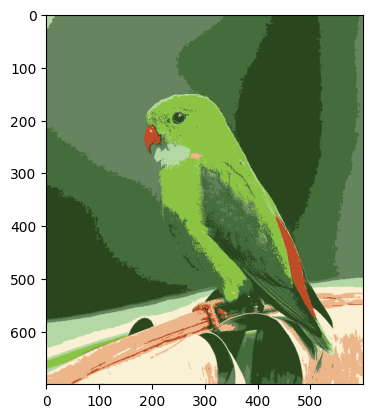

In [31]:
img_CQ=clr_quat(image,8)
plt.imshow(img_CQ)
plt.show()

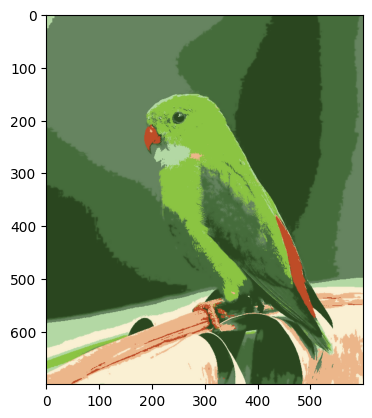

In [32]:
blurred=cv2.bilateralFilter(img_CQ,7,75,75)
plt.imshow(blurred)

In [39]:
def cartoon(blurred):
  c=cv2.bitwise_and(blurred,blurred,mask=edges)
  fig, ax = plt.subplots(1, 2, figsize=(10, 5))
  # Display images
  ax[0].imshow(c)
  ax[0].set_title("Cartoon")
  ax[0].axis("off")  # Hide axes

  ax[1].imshow(og)
  ax[1].set_title("Original")
  ax[1].axis("off")
  plt.show()

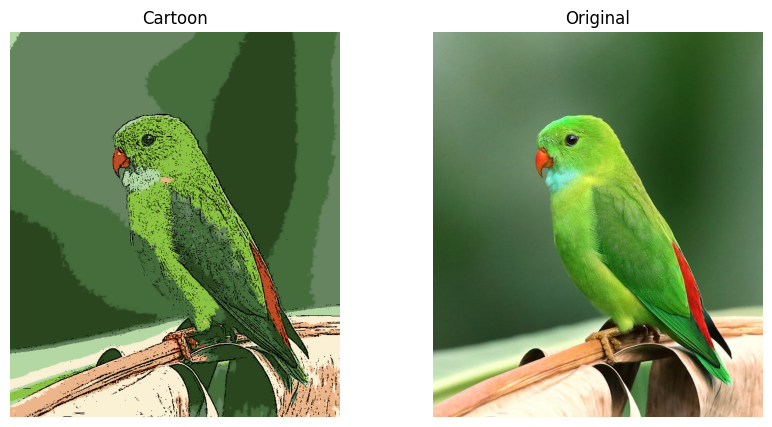

In [40]:
cartoon(blurred)